<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/mHealth/mHealth_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, json, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
SAMPLING_RATE=50
DATA_DIR="/content/drive/MyDrive/datasets/MHEALTHDATASET"

In [4]:
COLS = [
    "chest_acc_x", "chest_acc_y", "chest_acc_z",
    "ecg_lead1", "ecg_lead2",
    "lankle_acc_x", "lankle_acc_y", "lankle_acc_z",
    "lankle_gyro_x", "lankle_gyro_y", "lankle_gyro_z",
    "lankle_mag_x", "lankle_mag_y", "lankle_mag_z",
    "rarm_acc_x", "rarm_acc_y", "rarm_acc_z",
    "rarm_gyro_x", "rarm_gyro_y", "rarm_gyro_z",
    "rarm_mag_x", "rarm_mag_y", "rarm_mag_z",
    "label"
]

In [5]:
ACTIVITY_MAP = {
    0: "null",
    1: "standing",
    2: "sitting",
    3: "lying",
    4: "walking",
    5: "climbing_stairs",
    6: "waist_bends_forward",
    7: "frontal_arm_raise",
    8: "knees_bending",
    9: "cycling",
    10: "jogging",
    11: "running",
    12: "jump_front_back"
}

In [6]:
#파일 목록 확인
files = sorted(glob.glob(os.path.join(DATA_DIR, "mHealth_subject*.log")))
print(f"Found {len(files)} subject files.")
print(files[:3])

Found 10 subject files.
['/content/drive/MyDrive/datasets/MHEALTHDATASET/mHealth_subject1.log', '/content/drive/MyDrive/datasets/MHEALTHDATASET/mHealth_subject10.log', '/content/drive/MyDrive/datasets/MHEALTHDATASET/mHealth_subject2.log']


In [7]:
#첫번째 파일 shape 확인
df = pd.read_csv(files[0], delim_whitespace=True, header=None)
df.columns = COLS
df["subject"] = int(re.search(r"subject(\d+)", files[0]).group(1))
df["t"] = np.arange(len(df)) / SAMPLING_RATE

print("\nFirst subject shape:", df.shape)
df.head()

/tmp/ipython-input-1227587685.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(files[0], delim_whitespace=True, header=None)



First subject shape: (161280, 26)


,chest_acc_x,chest_acc_y,chest_acc_z,ecg_lead1,ecg_lead2,lankle_acc_x,lankle_acc_y,lankle_acc_z,lankle_gyro_x,lankle_gyro_y,...,rarm_acc_z,rarm_gyro_x,rarm_gyro_y,rarm_gyro_z,rarm_mag_x,rarm_mag_y,rarm_mag_z,label,subject,t
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0,1,0.00
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0,1,0.02
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0,1,0.04
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0,1,0.06
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0,1,0.08


In [11]:
# 전체 합치기
dfs = []
for f in files:
    tmp = pd.read_csv(f, delim_whitespace=True, header=None)
    tmp.columns = COLS
    tmp["subject"] = int(re.search(r"subject(\d+)", f).group(1))
    tmp["t"] = np.arange(len(tmp)) / SAMPLING_RATE
    dfs.append(tmp)

/tmp/ipython-input-2767850356.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tmp = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipython-input-2767850356.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tmp = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipython-input-2767850356.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tmp = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipython-input-2767850356.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tmp = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipython-input-2767850356.py:4: FutureWarning: T

In [12]:
data = pd.concat(dfs, axis=0, ignore_index=True)
print("\nTotal shape:", data.shape)
print("Subjects:", sorted(data['subject'].unique()))
print("Total time (min):", len(data)/SAMPLING_RATE/60)


Total shape: (1215745, 26)
Subjects: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Total time (min): 405.24833333333333


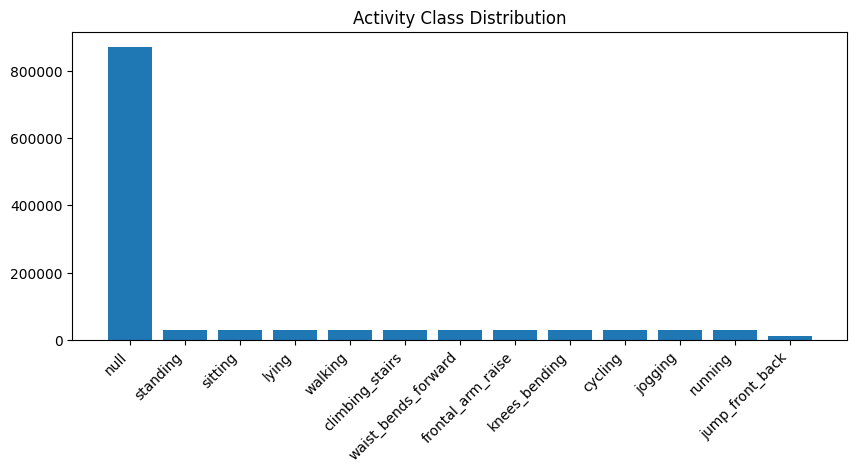

In [13]:
counts = data["label"].value_counts().sort_index()
labels = [ACTIVITY_MAP[i] for i in counts.index]

plt.figure(figsize=(10,4))
plt.bar(labels, counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Activity Class Distribution")
plt.show()

In [18]:
data = data[data["label"] != 0].reset_index(drop=True)

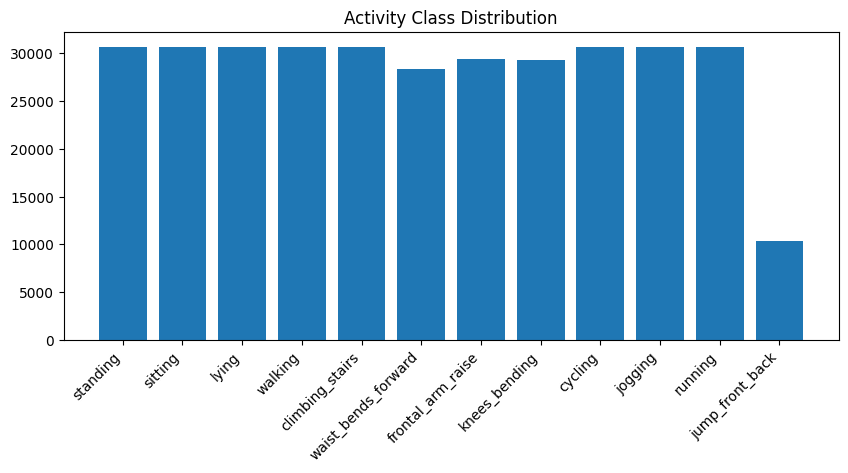

In [19]:
counts = data["label"].value_counts().sort_index()
labels = [ACTIVITY_MAP[i] for i in counts.index]

plt.figure(figsize=(10,4))
plt.bar(labels, counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Activity Class Distribution")
plt.show()

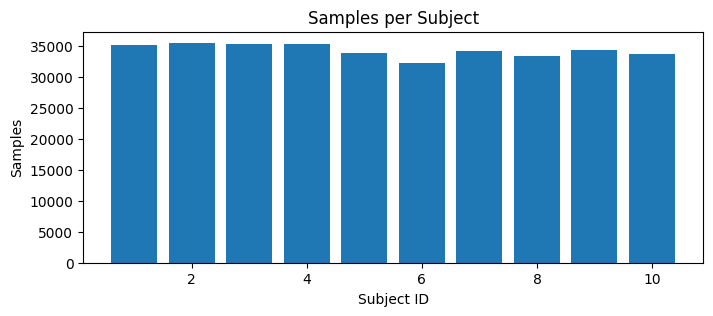

In [21]:
#피험자 샘플 수
sub_counts = data["subject"].value_counts().sort_index()
plt.figure(figsize=(8,3))
plt.bar(sub_counts.index, sub_counts.values)
plt.title("Samples per Subject")
plt.xlabel("Subject ID")
plt.ylabel("Samples")
plt.show()


--- 5. 센서 데이터 분포 확인 (Density Plots) ---
Accelerometer columns: ['chest_acc_x', 'chest_acc_y', 'chest_acc_z', 'lankle_acc_x', 'lankle_acc_y', 'lankle_acc_z', 'rarm_acc_x', 'rarm_acc_y', 'rarm_acc_z']


<Figure size 1500x800 with 0 Axes>

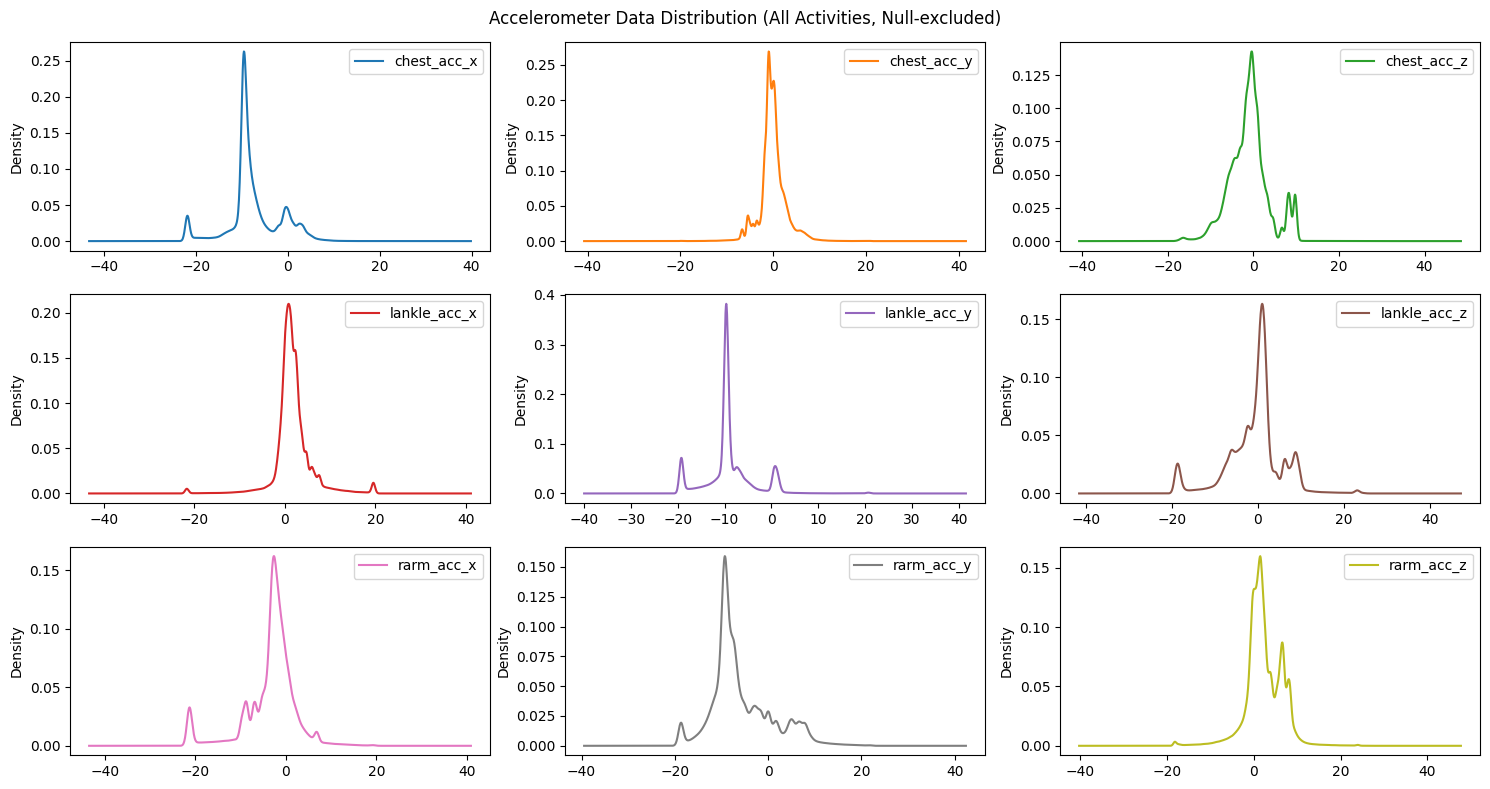

In [34]:
print("\n--- 5. 센서 데이터 분포 확인 (Density Plots) ---")

# 가속도계 (Accelerometer)
# COLS 리스트에서 '_acc_'가 포함된 컬럼명 필터링
acc_cols = [c for c in COLS if '_acc_' in c]

print(f"Accelerometer columns: {acc_cols}")
plt.figure(figsize=(15, 8))
data[acc_cols].plot(
    kind='density',
    subplots=True,
    layout=(3, 3),
    sharex=False,
    figsize=(15, 8),
    title="Accelerometer Data Distribution (All Activities, Null-excluded)"
)
plt.tight_layout()
plt.show()

Gyroscope columns: ['lankle_gyro_x', 'lankle_gyro_y', 'lankle_gyro_z', 'rarm_gyro_x', 'rarm_gyro_y', 'rarm_gyro_z']


<Figure size 1200x600 with 0 Axes>

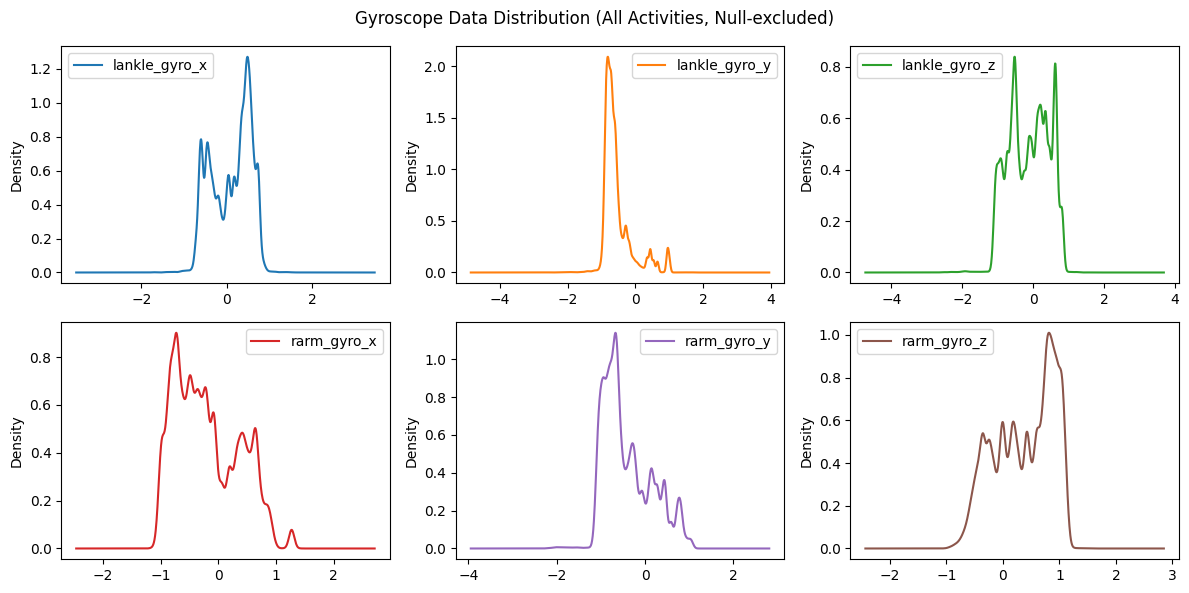

In [35]:
gyro_cols = [c for c in COLS if '_gyro_' in c]

print(f"Gyroscope columns: {gyro_cols}")
plt.figure(figsize=(12, 6))
data[gyro_cols].plot(
    kind='density',
    subplots=True,
    layout=(2, 3),
    sharex=False,
    figsize=(12, 6),
    title="Gyroscope Data Distribution (All Activities, Null-excluded)"
)
plt.tight_layout()
plt.show()

Magnetometer columns: ['lankle_mag_x', 'lankle_mag_y', 'lankle_mag_z', 'rarm_mag_x', 'rarm_mag_y', 'rarm_mag_z']


<Figure size 1200x600 with 0 Axes>

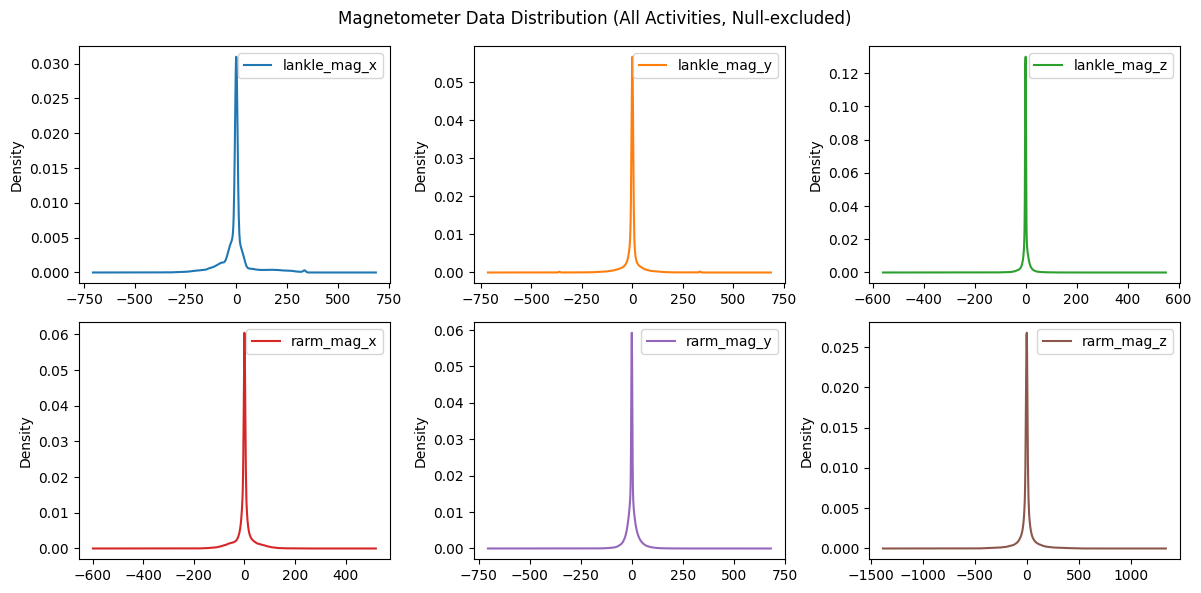

In [36]:
# 지자기 (Magnetometer)
# COLS 리스트에서 '_mag_'가 포함된 컬럼명 필터링
mag_cols = [c for c in COLS if '_mag_' in c]

print(f"Magnetometer columns: {mag_cols}")
plt.figure(figsize=(12, 6))
data[mag_cols].plot(
    kind='density',
    subplots=True,
    layout=(2, 3),
    sharex=False,
    figsize=(12, 6),
    title="Magnetometer Data Distribution (All Activities, Null-excluded)"
)
plt.tight_layout()
plt.show()


Example data shape (10s): (500, 26)


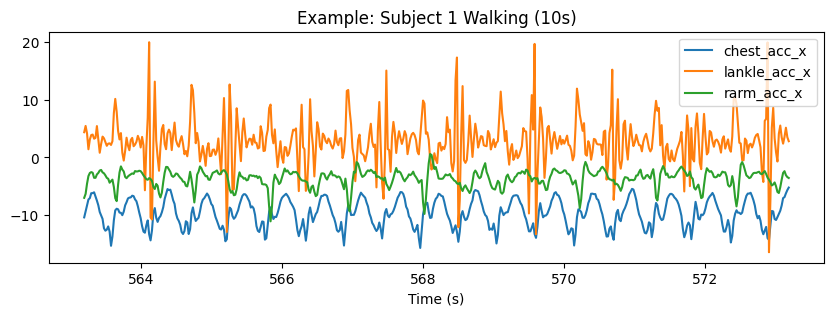

In [22]:
sub = data[(data["subject"]==1) & (data["label"]==4)]
sub = sub.iloc[:10*SAMPLING_RATE]  # 10초만 보기
print(f"\nExample data shape (10s): {sub.shape}")

plt.figure(figsize=(10,3))
plt.plot(sub["t"], sub["chest_acc_x"], label="chest_acc_x")
plt.plot(sub["t"], sub["lankle_acc_x"], label="lankle_acc_x")
plt.plot(sub["t"], sub["rarm_acc_x"], label="rarm_acc_x")
plt.title("Example: Subject 1 Walking (10s)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

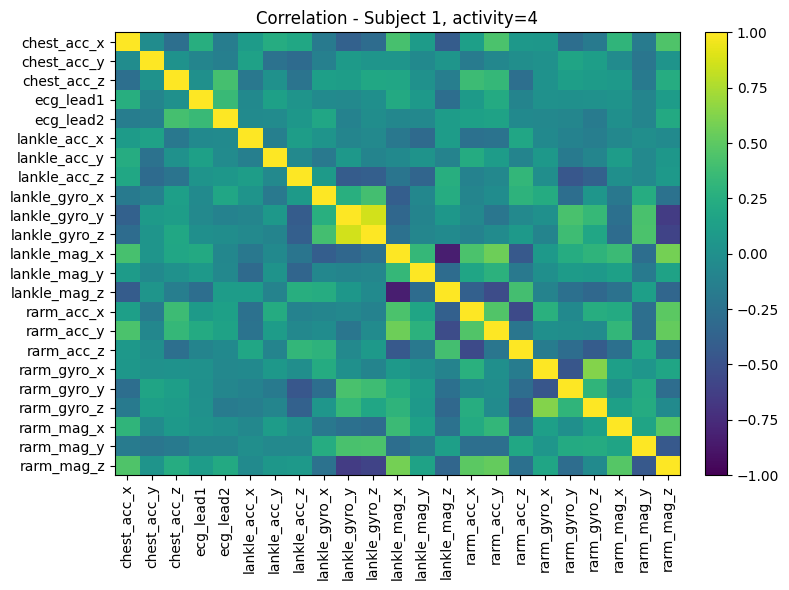

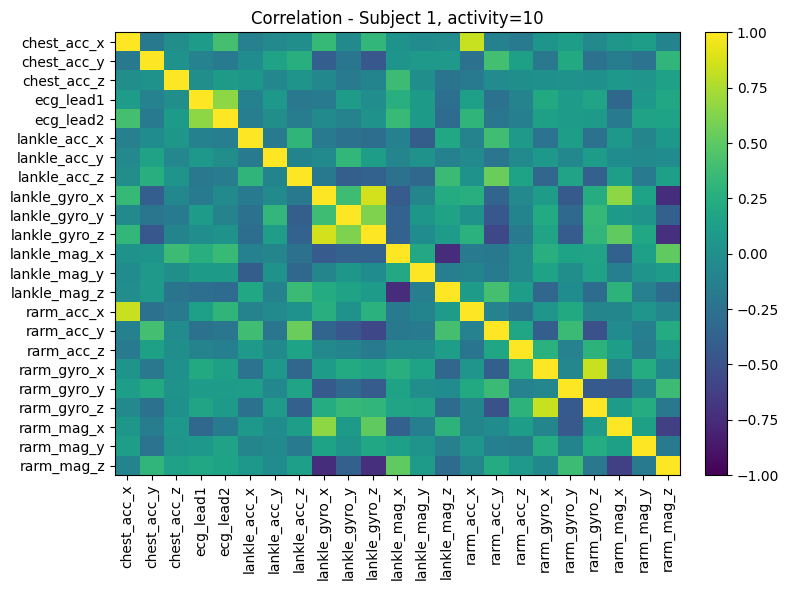

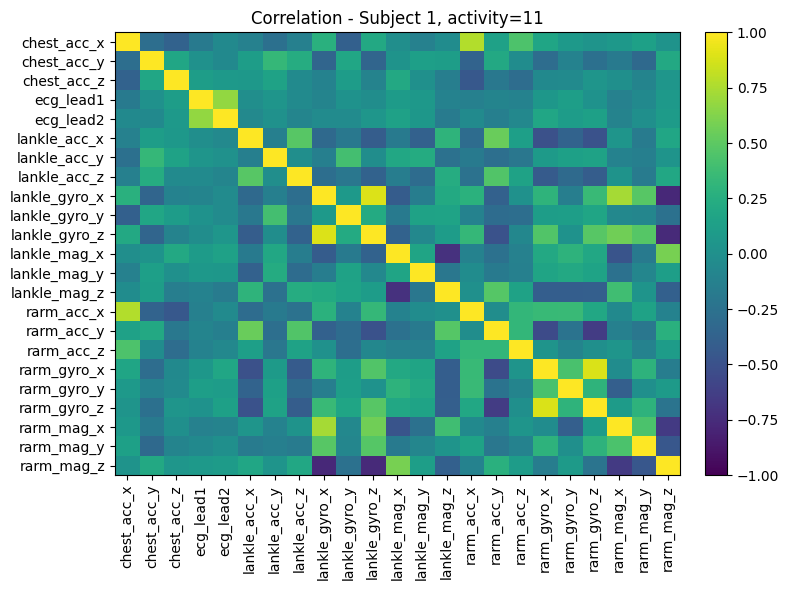

In [29]:
sub1 = data[data["subject"]==1].sample(5000, random_state=42)
num_cols = [c for c in COLS if c != "label"]
corr = sub1[num_cols].corr()

for lab in [4, 10, 11]:  # 예: walking, jogging, running
    d = data[(data["subject"]==1) & (data["label"]==lab)]
    if len(d) < 1000:
        continue
    corr = d[num_cols].corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr.values, aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title(f"Correlation - Subject 1, activity={lab}")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()


ECG columns: ['ecg_lead1', 'ecg_lead2']


<Figure size 1000x400 with 0 Axes>

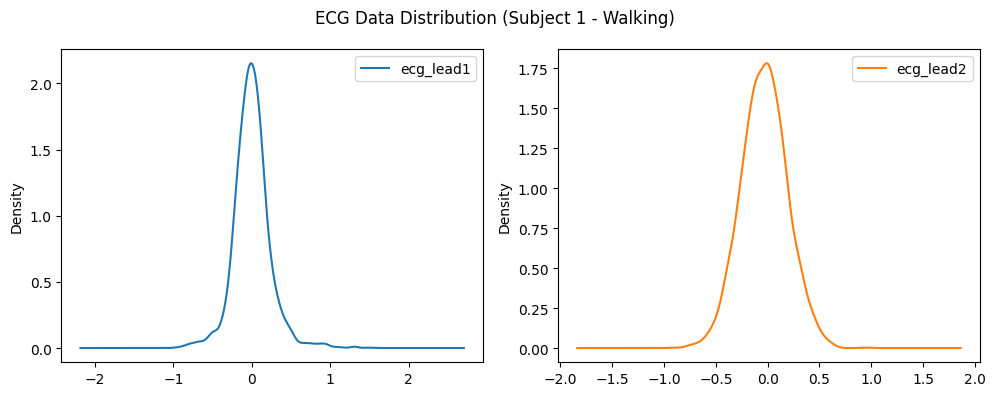

In [32]:
import matplotlib.pyplot as plt

ecg_cols = [col for col in data.columns if 'ecg' in col.lower()]
print("ECG columns:", ecg_cols)

activity_data = data[(data["subject"] == 1) & (data["label"] == 4)]

plt.figure(figsize=(10, 4))

# 밀도 분포(density plot)
activity_data[ecg_cols].plot(
    kind='density',
    subplots=True,
    layout=(1, len(ecg_cols)),
    sharex=False,
    figsize=(10, 4),
    title="ECG Data Distribution (Subject 1 - Walking)"
)

plt.tight_layout()
plt.show()
